## CHAPTER 7 군집화
### 01 K-평균 알고리즘
- K-평균은 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
 - 군집 중심점 : 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화함.
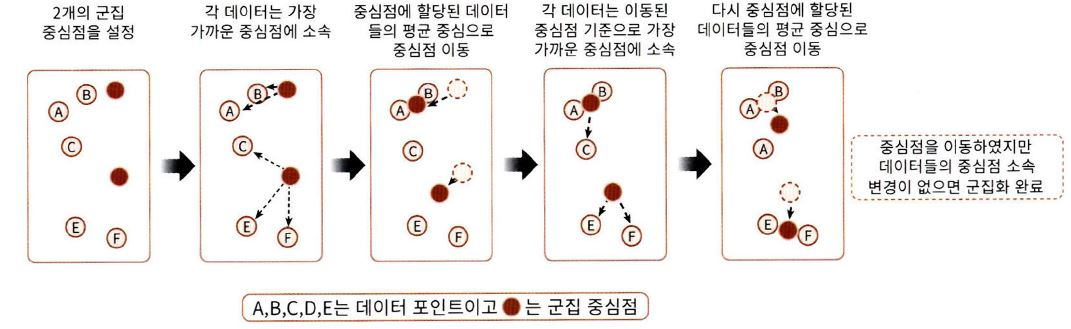
1. K-평균의 장점
 1. 일반적인 군집화에서 가장 많이 활용되는 알고리즘
 2. 알고리즘이 쉽고 간결함
2. K-평균의 단점
 1. 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
 2. 반복 수행시 반복 횟수가 많을 경우 수행시간이 매우 느려짐
 3. 몇개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

#### 1) 사이킷런 KMeans 클래스 소개
1. KMeans 클래스의 초기화 파라미터 
~~~
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
~~~
 1. n_clusters: 군집화할 개수 즉 군집 중심점의 개수를 의미
 2. init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정
 3. max_iter: 최대 반복 횟수, 이 횟수 이전에 모든 데이터 중심점 이동이 없으면 종료함
1. KMeans 클래스의 메서드 및 주요 속성 정보
 1. fit(데이터세트) 또는 fit_transform(데이터세트) 메서드 이용
 2. labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
 3. cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집개수, 피처개수]), 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음
 
 #### 2) K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
# labels_ 속성값으로 각 데이터가 어떤 중심에 속하는지 출력
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_의 값이 0,1,2로 돼있는 것은 각 레코드가 첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

In [6]:
# 실제 분류값인 target과 군집화 분류값인 cluster 레벨에 group by 연산을 적용해 target과 cluster값 개수를 비교
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됨
- Target 1 값 데이터는 2개만 2번 군집으로 그루핑, 나머지 48개는 모두 0번 군집으로 그루핌됨
- Target 2 값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됨

In [7]:
# 붓꽃 데이터의 군집화 2차원 평면상에 시각화
# 속성이 4개이므로 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pca_x']=pca_transformed[:,0] # X좌표값
irisDF['pca_y']=pca_transformed[:,1] # Y좌표값
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


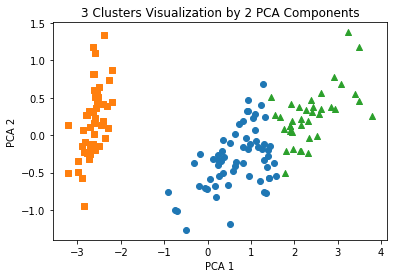

In [8]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

# 군집값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리돼 있음
- Cluster 0을 나타내는 동그라미와 Cluster 2를 나타내는 세모는 상당 수준 분리돼 있지만, 네모만큼 명확하게는 분리돼 있지 않음
- Cluster 0과 1의 경우 속성의 위치 자체가 명확하게 어려운 부분이 존재 <?

#### 3) 군집화 알고리즘 테스트를 위한 데이터 생성
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 데이터 생성기 API 제공
 - make_blobs() API : 개별 군집의 중심점과 표준편차 제어 기능이 추가돼 있음, 하나의 클래스의 여러개의 군집이 분포될 수 있게 데이터를 생성
 - make_classification() : 노이즈를 포함한 ㅔ이터를 만드는 데 유용하게 사용할 수 있음, 하나의 클래스의 여러개의 군집이 분포될 수 있게 데이터를 생성
 - make_cirle(), make_moon() : 중심 기반의 군집화로 해결하기 어려운 데이터를 만드는 데 사용됨
- make_blos()의 호출 파라미터
 1. n_samples: 생성할 총 데이터의 개수, 디폴트는 100개
 2. n_features: 데이터의 피처 개수
 3. centers: int 값이면 군집의 개수, ndarray 형태면 개별 중심점의 좌표
 4. cluster_std: 생성될 군집 데이터의 표준편차, float 혹은 list 형태

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 
# 시각화 목표시 2개로 설정해 첫번째 피처는 x 좌표, 두번째 피처는 y 좌표상에 표현
print(X.shape, y.shape)

# y target 값의 분포를 확인 
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가짐
- 3개의 cluster의 값은 [0,1,2]이며 각 67, 67, 66개로 균일하게 구성

In [15]:
# 데이터세트 DataFrame으로 변환
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


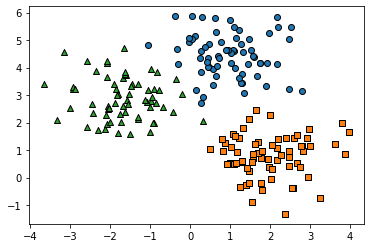

In [16]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

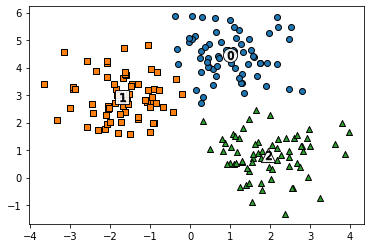

In [25]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmenas = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X) # X 데이터 군집화
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', alpha=0.9, edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [26]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- Target 0이 cluster label 0으로, Target 1이 cluster label 1로, Target 2가 cluster label 2로 거의 대부분 잘 매핑됨

### 02 군집평가(Cluster Evaluation)
- 대부분은 앞의 붓꽃 데이터 세트와 달리 군집화가 얼마나 효율적으로 됐는지 비교할만한 타깃 레이블을 가지고 있지 않음
- 군집화는 분류와 유사해보일 수 있으나 성격이 많이 다름 - 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여하거나, 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나, 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있음
- 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵지만, 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용함

#### 1) 실루엣 분석의 개요
- 실루엣 분석(silhouette analysis)는 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
 - 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
 - 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것
- 실루엣 분석은 실루엣 계수 (silhouette coefficient)를 기반으로 함
 - 실루엣 계수는 개별 데이터가 가지는 군집화 지표. 해당 데이터가 같은 군집 내의 테이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표
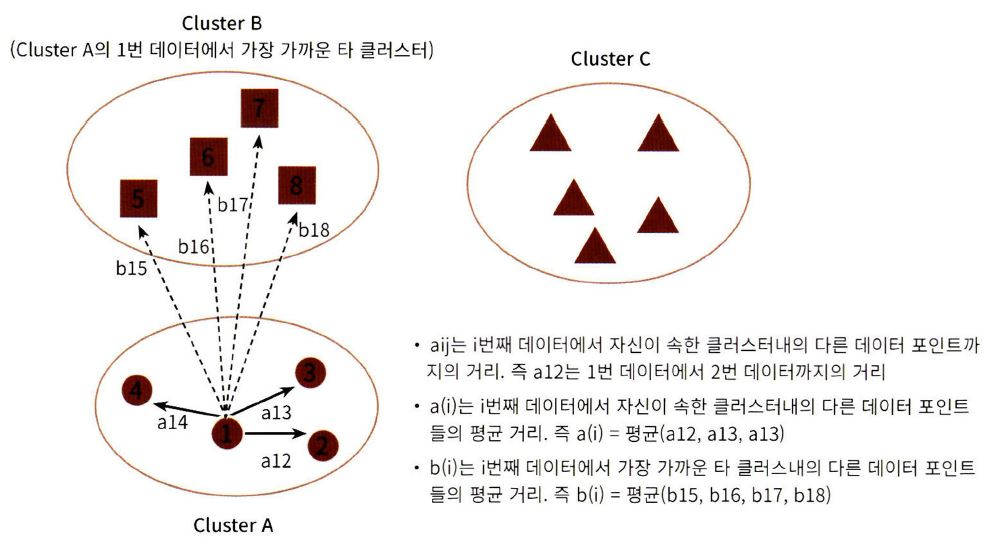

- 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i)-a(i). 이를 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눈 s(i) 값으로 정의됨
 - $s(i) = \frac{(b(i)-a(i))}{MAX(a(i), b(i))}$
 - -1에서 1 사이의 값, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있으며 0에 가까울수록 근처의 군집과 가까움. - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함     
- 사이킷런 제공 메서드
 - **sklearn.metrics.silhouette_samples(X, labels, metric='eclidean, \*\*kwds)**: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
 - **sklearn.metrics.silhouette_score(X, labels, metric='eclidean, sample_size=None, \*\*kwds)**: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터 포인트의 실루엣 계수를 평균해 반환. 즉 np.mean(silhouette_samples()). 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있지만 값이 높다고 해서 무조건 군집화가 잘 됐다고 판단할 수는 없음
 
- 좋은 군집화가 되기 위해 만족해야하는 조건
 - 전체 실루엣 계수의 평균값, silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
 - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 전체 실루엣 계수의 평균값은 높지만 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님
 
#### 2) 붓꽃 데이터 세트를 이용한 군집 평가

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값이 약 0.553
- 1번 군집의 경우 0.8 이상의 높은 실루엣 계수값을 나타냄

In [3]:
# 군집별 평균 실루엣 계수 값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 0.45로 상대적으로 평균값이 1번에 비해 낮음

#### 3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음
 - 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 뭉쳐있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단 가능
- 이와 같은 방법을 시각적으로 지원해주는 예제

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


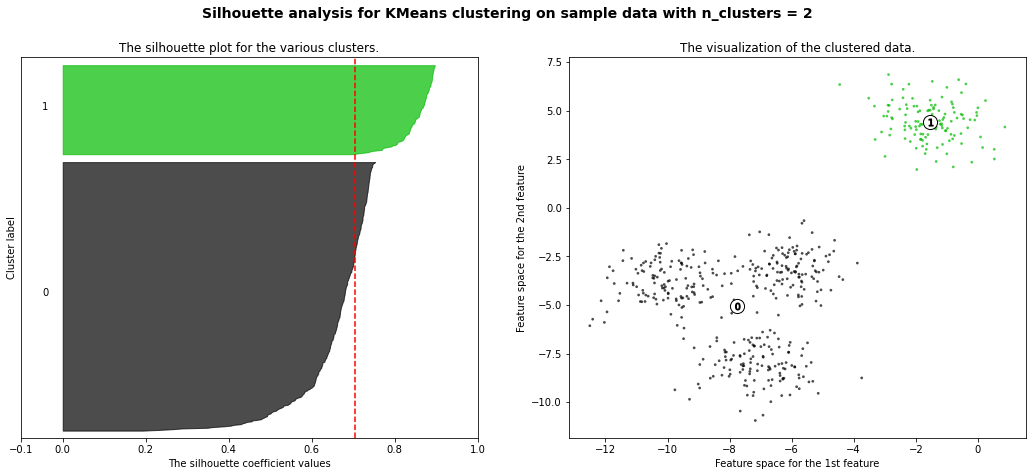

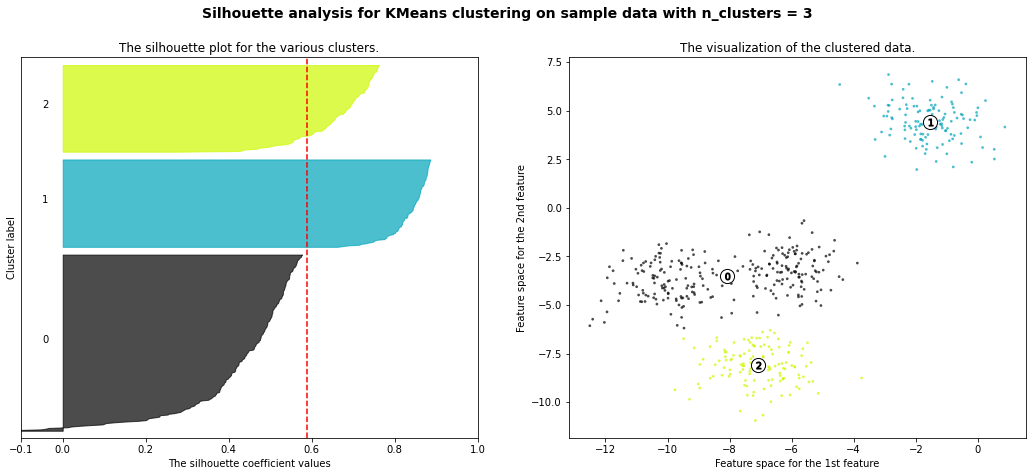

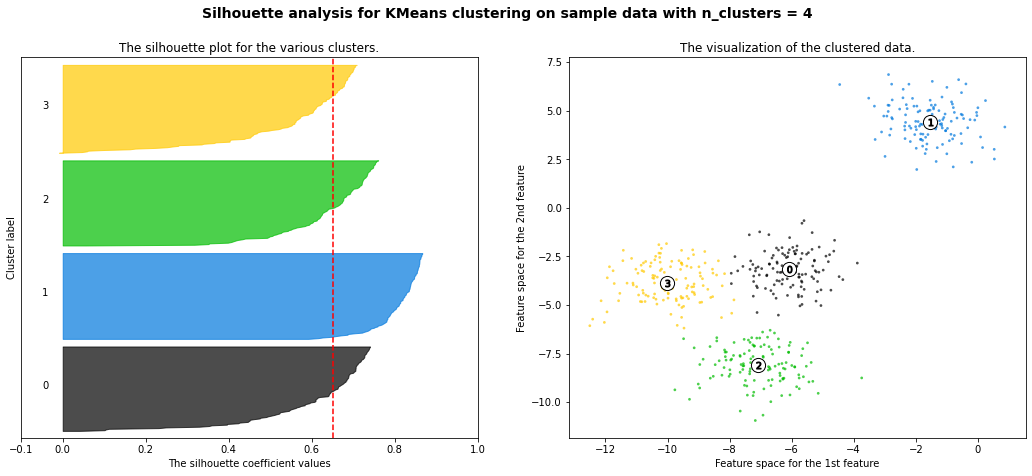

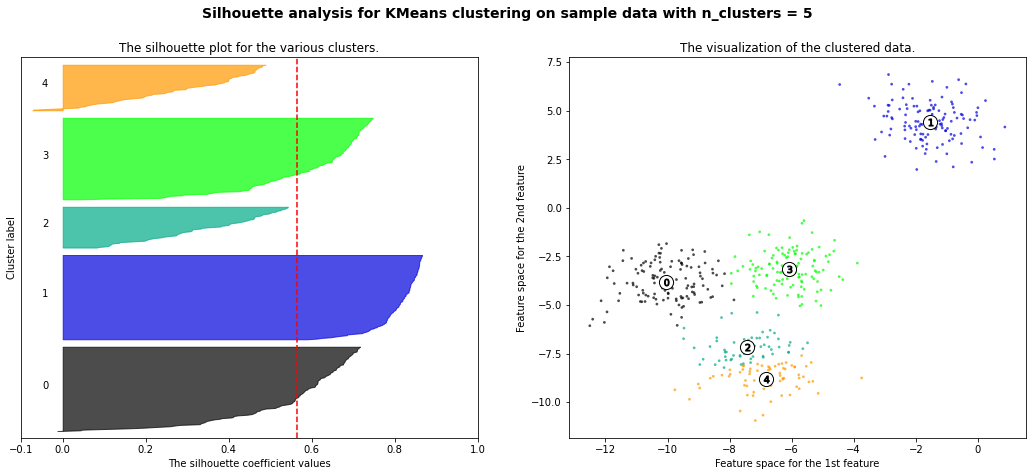

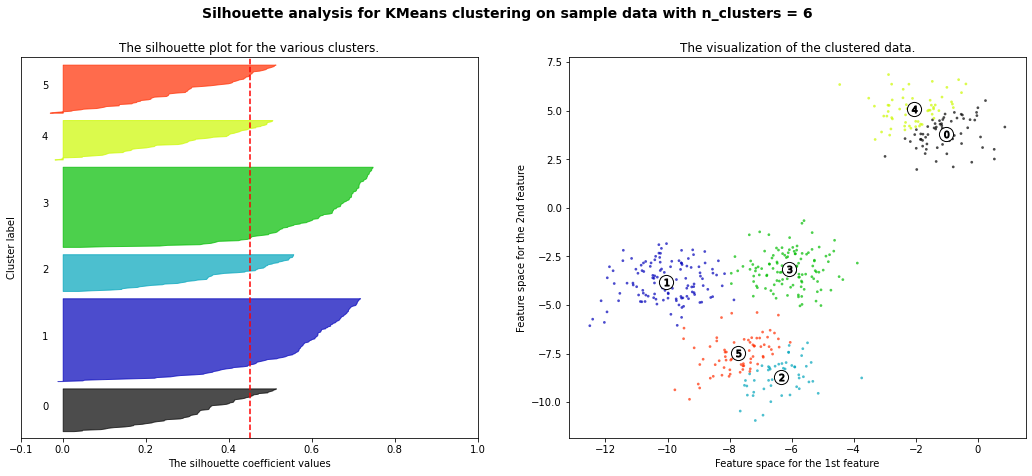

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

- 개별 군집에 속하는 데이터계수를 2차원으로 시각화, X축은 실루엣 계수 값, Y축은 개별 군집과 이에 속하는 데이터. 개별 군집에 해당하는 데이터는 Y축 높이로 추측 가능. 점선으로 표시된 선은 전체 평균 실루엣 계수 값
1. 군집 개수가 2개인 경우
 1. 평균 실루엣 계수는 높게 나타남
 2. 0번 군집의 모든 데이터는 평균 실루엣 계수 값 이상
 3. 1번 군집의 경우는 평균보다 적은 데이터값이 매우 많음 
 4. 0번 군집의 경우는 0번 군집과 멀리 떨어져있고 내부 데이터끼리도 잘 뭉쳐있지만, 1번 군집의 경우는 내부 데이터끼리 많이 떨어져있기 때문
2. 군집 개수가 3개인 경우 
 1. 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮음
 2. 0번의 경우 내부 데이터간의 거리도 멀지만, 2번 군집과도 가깝게 위치하고 있음
3. 군집이 4개인 경우 
 1. 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치함
 2. 1번 군집의 경우 모든 데이터가 평균보다 높은 계수값을 가짐
 3. 0번, 2번의 경우는 절반 이상이 평균보다 높은 계수값을, 3번 군집의 경우만 약 1/3정도가 평균보다 높은 계수 값을 가짐
- 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있음

In [4]:
def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

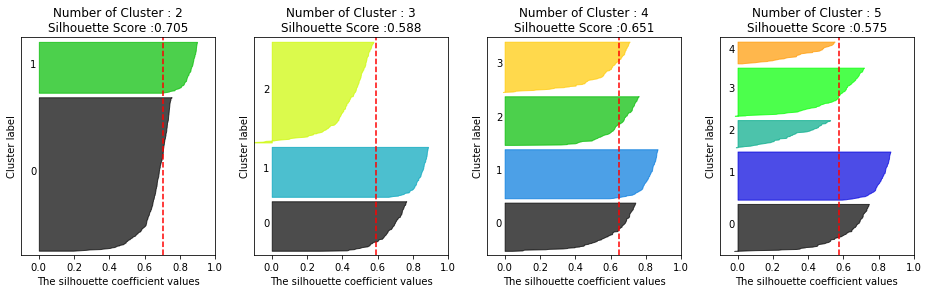

In [8]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1) 
# 시각화 목표시 2개로 설정해 첫번째 피처는 x 좌표, 두번째 피처는 y 좌표상에 표현

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

- 4개의 군집일 때 가장 최적이 됨

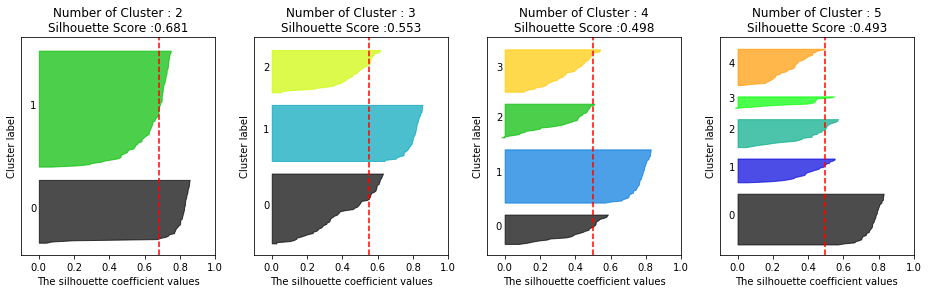

In [9]:
# 붓꽃 데이터를 이용해 K-평균 수행시 최적의 군집 개수 파악
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- 군집 개수를 2개로 하는 것이 가장 좋아보임
- 군집 개수가 3개인 경우 평균 실루엣 계수 값이 2개일 때보다 작으며 1번 군집과 0, 2번 군집 간의 실루엣 계수의 편차가 큼


> 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남
> 몇만건 이상의 데이터에 대해 개인용 PC에서 수행시 메모리 부족등의 에러가 발생하기 쉬옴
> 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야함

### 03 평균 이동
#### 1) 평균 이동(Mean Shift의 개요)
- 평균 이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행하지만, K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시킴
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음
 - 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안, 이를 위해 확률 밀도 함수를 이용함.
 - 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄
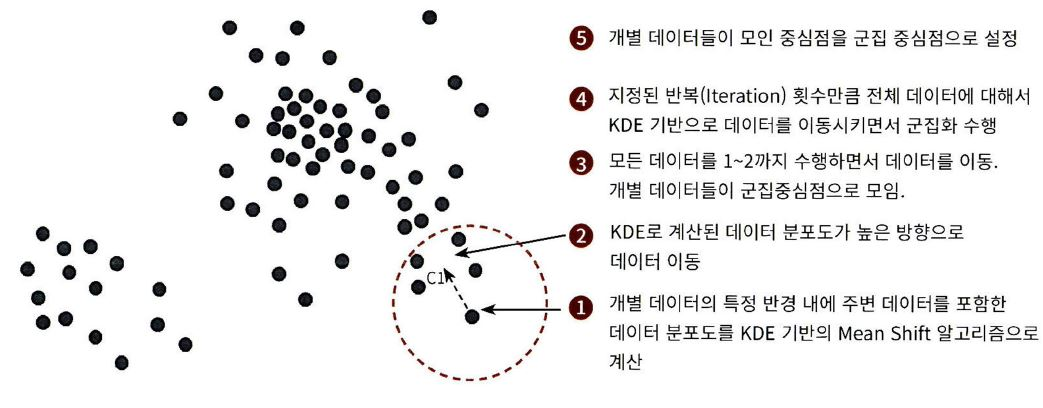

- **KDE(Kernel Density Estimation)**
 - 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
 - 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
 - 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨
 - 다음과 같은 커널 함수식으로 표현됨 (K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭(bandwidth))
> $KDE$=$\frac{1}{n}$$\sum_{i=1}^n K_h$$(x-x_i)$ = $\frac{1}{nh}$$\sum_{i=1}^n K(\frac{x-x_i}{h})$
 - 대역폭 h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(smoothing)하는 데 적용되며, h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있음
 1. 작은 h값(ex. h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률밀도함수를 추정하므로 과적합하기 쉬움
 2. 매우 큰 h값(ex. h=10)은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률밀도함수를 추정하므로 과소적합하기 쉬움
 3. 따라서 적절한 KDE의 대역폭 h를 계산하는 것이 KDE 기반의 평균 이동 군집화에서 매우 중요
 4. 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며, 대역폭이 적을수록 많은 수의 군집 중심점을 가짐
 5. 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행
- 사이킷런의 MeanShift 클래스
 - 가장 중요한 초기화 파라미터는 bandwidth (대역폭 h)
 - 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0부터 5까지 6개로 지치게 세분화돼 군집화됨
- bandwidth를 높여서 MeanShift를 재수행할 필요

In [2]:
meanshift=MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 잘 군집화됨
- 사이킷런은 최적화된 bandwidth 값을 찾기 위해 estimate_bandwidth() 함수 제공
- 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환함

In [3]:
# estimate_bandwidth 함수 이용, 파라미터로 피처 데이터 세트 입력

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
# estimate_bandwidth()로 측정된 bandwidth를 평균 이동 입력값으로 적용해 군집화 수행
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 구성됨

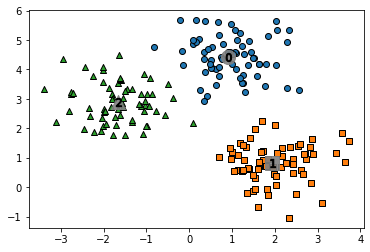

In [6]:
# 3개의 군집 시각화
# cluster_centers 속성으로 군집 중심 좌표를 표시
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    #군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [7]:
# target값과 군집label 값 비교
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- Target 값과 군집 Label 값이 1:1로 잘 매칭됨


##### 평균 이동의 장점
1. 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것
2. 이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요도 없음
- 하지만 알고리즘의 수행 시간이 오래걸리며 bandwidth의 크기에 따른 군집화 영향도가 큼
 - 이와 같은 특징으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터세트보다는 컴퓨터 비전 영역에서 더 많이 사용됨. 이미지, 영상 데이터에서 특적 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행함.
 
### 04 GMM(Gaussian Mixture Model)
#### 1) GMM(Gaussian Mixture Model) 소개
- GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포(Gaussian Dstribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행
 - 가우시안 분포 : 정규분포, 좌우 대칭형의 종(Bell) 형태를 가진 연속 확률 함수
 - 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출
 - 데이터를 구성하는 여러개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정
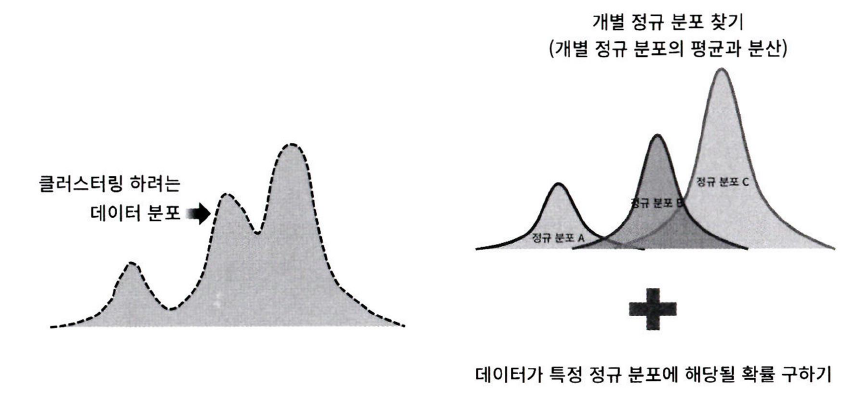
- 2가지를 추정하는 모수 추정 방식 
 1. 개별정규분포의 평균과 분산
 2. 각 데이터가 어떤 정규분포에 해당되는지의 확률
- EM(Expectation and Maximization) 방법을 적용해 모수 추정 군집화 (확률 기반 군집화)

#### 2) GMM을 이용한 붓꽃 데이터 세트 군집화

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

- GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components로, gaussian mixture의 모델의 총 개수

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster'칼럼 명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- Target만 cluster 2로 45개, cluster 1로 5개 매핑
- 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과

In [15]:
# 붓꽃 데이터 세트의 K-평균 군집화 수행 결과
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


- 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미
- K-평균은 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있음

#### 3) GMM과 K-평균의 비교
- KMeans는 원형의 범위에서 군집화 수행, 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐
- make_blobs() 군집의 수를 3개로 하되, cluster_std를 작게 설정해 데이터가 원형 형태로 분산될 수 있도록 한 결과
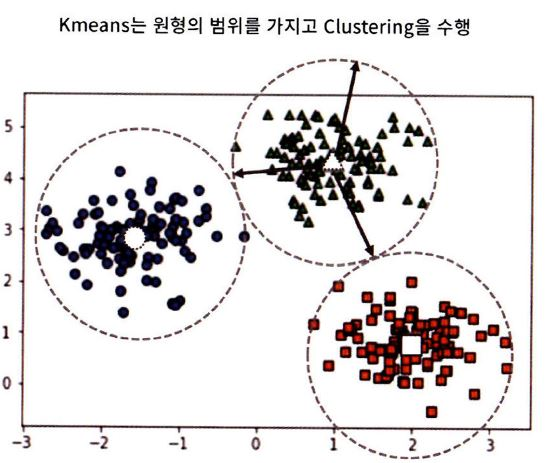
- KMeans는 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

In [16]:
# 군집 시각화를 위한 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

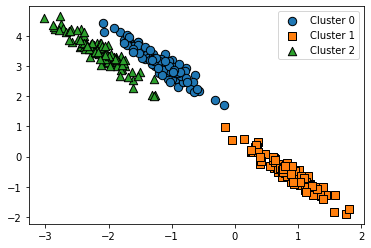

In [17]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0) 

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = X @ transformation

# feature 데이터세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(X_aniso, columns=['ftr1','ftr2'])
clusterDF["target"] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

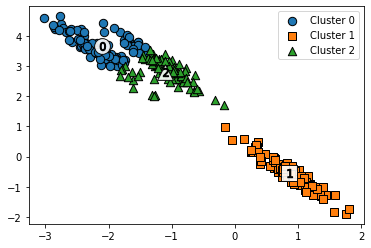

In [18]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

- KMeans로 군집화 수행시 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음
- KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서, 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어려움

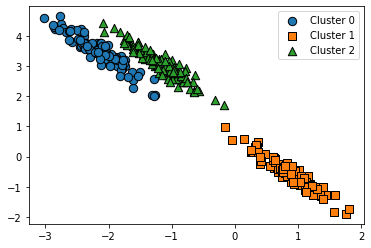

In [19]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GMM은 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정 <?
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됨
- GMM은 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않음

In [21]:
# target 값과 KMeans, GMM의 군집 Label값을 서로 비교해 군집화 효율 차이 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 Target 값과 어긋나는 경우 발생
- GMM의 경우 군집이 target 값과 잘 매핑됨 
 - GMM은 유연하게 다양한 세트에 잘 적용될 수 있다는 장점
 - 하지만 군집화를 위한 수행시간이 오래 걸린다는 단점

### 05 DBSCAN
#### 1) DBSCAN 개요
- DBSCAN(Density Based Spatial Clustering of Applications with Noise)는 밀도 기반 군집화의 대표적인 알고리즘
- 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능 (ex. 내부의 원 모양과 외부의 원 모양 형태의 분포)
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있음
- DBSCAN을 구성하는 가장 중요한 두 가지 파라미터
 1. **입실론 주변 영역(epsilon)**: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
 2. **최소 데이터 개수(min points)**: 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
- 데이터 포인트의 정의
 1. 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
 2. 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터
 3. 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 경우
 3. 잡음 포인트(Noise Point): 최소 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 경우
 
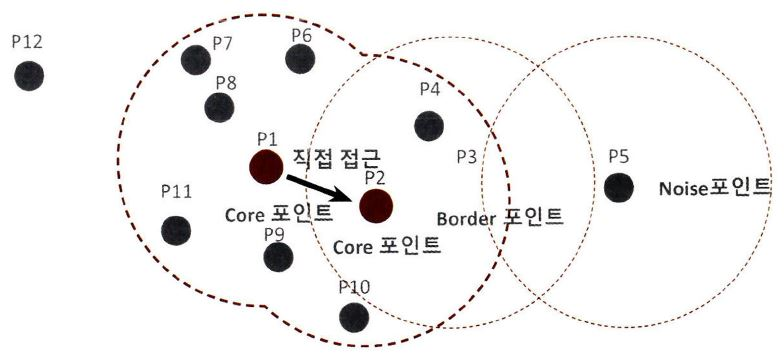
1. P1에서 P12까지 12개의 데이터 세트 존재, 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정
2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신 P1, 이웃 데이터 P2,P6,P7,P8,P9,P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)
3. P2 역시 반경 내에 6개의 데이터(자신 P2, 이웃 데이터 P1,P3,P4,P9,P10)를 가지고 있으므로 핵심 포인트
4. 핵심 포인트 P1의 이웃데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능
5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성. 이러한 방식으로 점차적으로 군집(Cluster)영역을 확장
6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없지만, 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있음. 이처럼 자신은 핵심 포인트가 아니지만 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트(Border Point)라고 함. 경계 포인트는 군집의 외곽 형성
7. P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않은 데이터는 잡음 데이터(Noise Point)

- DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성
- DBSCAN 클래스의 초기화 파라미터
 1. eps: 입실론 주변 영역의 반경
 2. min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수(자신의 데이터를 포함함. min points+1)
 
#### 2) DBSCAN 적용하기 - 붓꽃 데이터 세트

In [25]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
- 위의 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두개의 군집으로 군집화됨
- Target 값 유형이 3가지인데 군집이 2개가 되었다고 군집화 효율이 떨어진다는 의미는 아님
- DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하며, 붓꽃 데이터 세트는 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있음

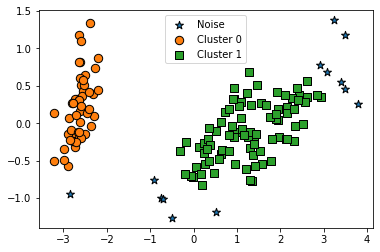

In [27]:
# DBSCAN 군집화 데이터 세트를 PCA를 이용해 2개의 피처로 압축 변환 후 시각화
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, "dbscan_cluster", iscenter=False)

- 별표로 표현된 값은 모두 노이즈
- DBSCAN을 적용시 특정 군집 개수로 군집을 강제하지 않는 것이 좋으며, 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요
 - 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
 - mins_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨 (매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


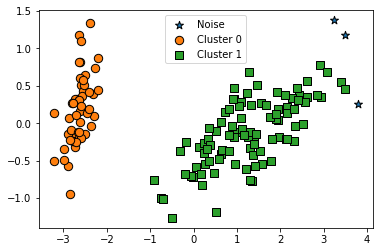

In [30]:
# eps 0.6 -> 0.8
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 군집인 -1이 3개밖에 없음
- 기존 eps=0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 cluster 1에 소속됨

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


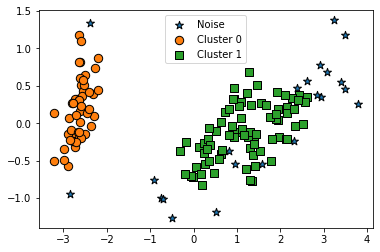

In [32]:
# min_samples 8 -> 16
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터가 기존보다 많이 증가함

#### 3) DBSCAN 적용하기 - make_circles() 데이터 세트
- 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘 비교

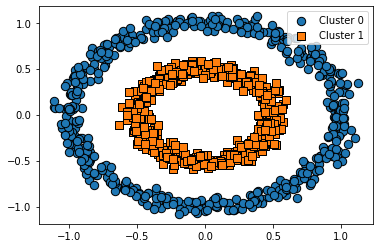

In [33]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
# factor : 외부 원과 내부 원의 scale 비율

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 내부 원과 외부 원으로 구분되는 데이터 세트 생성함

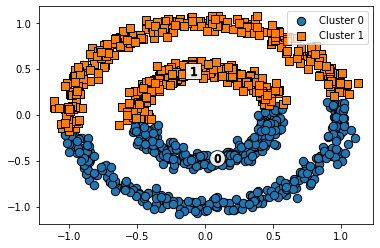

In [34]:
# 1) KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- 위, 아래 군집 중심을 기반으로 군집화됨
- 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

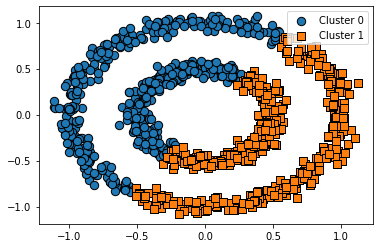

In [35]:
# 2) GMM으로 make_circles() 데이터 세트 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)
clusterDF["gmm_cluster"] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- GMM도 일렬로 늘어산 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 데이터 세트에서는 군집화가 원하는 방향으로 되지 않음

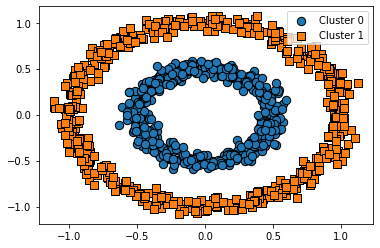

In [36]:
# 3) DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
dbscan_labels = dbscan.fit_predict(X)
clusterDF["dbscan_cluster"] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됨